In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from pybedtools import BedTool
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from scipy.spatial.distance import pdist, squareform
from plot_params import *
basedir= Path('/home/hsher/scratch/ABC_2rep/')
out_stem = 'K562_rep6'
#fl='/home/hsher/scratch/K562_rep4.count.csv'

In [2]:
megaoutputs_masked = pd.read_csv(basedir/'DMM_repeat'/'name'/f'{out_stem}.megaoutputs.tsv', sep = '\t', index_col = 0)
megaoutputs_genome_masked = pd.read_csv(basedir/'DMM'/f'{out_stem}.megaoutputs.tsv', sep = '\t', index_col = 0)


In [3]:
family_type = pd.read_csv('/home/hsher/scratch/ABC_2rep/DMM_repeat/name/K562_rep6.rbp_family_type.csv', index_col = 0)

In [4]:
simplified = family_type.copy()
rare = family_type.columns[family_type.le(5).all(axis = 0)]
simplified['other']=simplified[rare].sum(axis = 1)
simplified.drop(rare, axis = 1, inplace = True)

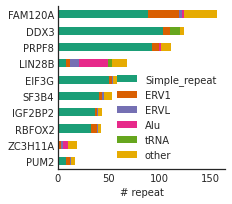

In [5]:
simplified.loc[simplified.sum(axis = 1).sort_values().index].plot.barh(stacked = True, figsize = (3,3))
sns.despine()
plt.xlabel('# repeat')
plt.savefig(figdir / 'repeat_family.pdf')

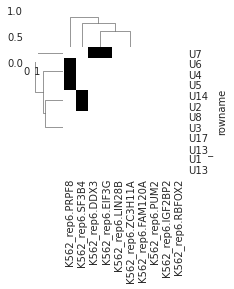

In [6]:
sns.clustermap(megaoutputs_masked.loc[(megaoutputs_masked['repFamily']=='snRNA'),
                      megaoutputs_masked.columns.str.startswith(out_stem)],
              figsize = (3,4), cmap = 'Greys', cbar = False)

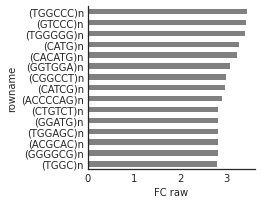

In [7]:
rbp = 'RBFOX2'
megaoutputs_masked.loc[(megaoutputs_masked['repFamily']=='Simple_repeat')&
                                (megaoutputs_masked[f'{out_stem}.{rbp}']),
                                f'fc_raw:{out_stem}.{rbp}'].sort_values().iloc[:15].plot.barh(
    color = 'grey', figsize = (3,3))
plt.xlabel('FC raw')
sns.despine()
plt.savefig(figdir / f'{rbp}_simple_repat.pdf')

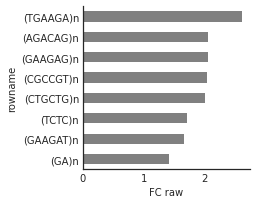

In [8]:
rbp = 'LIN28B'
megaoutputs_masked.loc[(megaoutputs_masked['repFamily']=='Simple_repeat')&
                                (megaoutputs_masked[f'{out_stem}.{rbp}']),
                                f'fc_raw:{out_stem}.{rbp}'].sort_values().iloc[:15].plot.barh(
    color = 'grey', figsize = (3,3))
plt.xlabel('FC raw')
sns.despine()
plt.savefig(figdir / f'{rbp}_simple_repat.pdf')

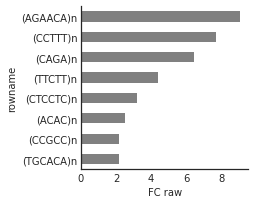

In [9]:
rbp = 'PUM2'
megaoutputs_masked.loc[(megaoutputs_masked['repFamily']=='Simple_repeat')&
                                (megaoutputs_masked[f'{out_stem}.{rbp}']),
                                f'fc_raw:{out_stem}.{rbp}'].sort_values().iloc[:15].plot.barh(
    color = 'grey', figsize = (3,3))
plt.xlabel('FC raw')
sns.despine()
plt.savefig(figdir / f'{rbp}_simple_repat.pdf')

In [10]:
def plot_mask(family, to_select = False, figsize = (3,3)):
    is_mask = megaoutputs_masked.loc[megaoutputs_masked['repFamily'].isin(family), megaoutputs_masked.columns.str.startswith(out_stem)]
    fc = megaoutputs_masked.loc[megaoutputs_masked['repFamily'].isin(family), megaoutputs_masked.columns.str.startswith('fc_raw:')]
    fc.columns = [i.split('.')[1] for i in fc.columns]
    is_mask.columns = [i.split('.')[1] for i in is_mask.columns]
    
    if to_select:
        to_plot = is_mask.index[is_mask.any(axis = 1)]
        sns.clustermap(fc.loc[to_plot],
                   figsize = figsize, cmap = 'Greys', yticklabels = 1,
                  mask = ~is_mask.loc[to_plot], cbar_kws = {'label':'FC raw'})
    else:
        sns.clustermap(fc,
                       figsize = figsize, cmap = 'Greys', yticklabels = 1,
                      mask = ~is_mask, cbar_kws = {'label':'FC raw'})

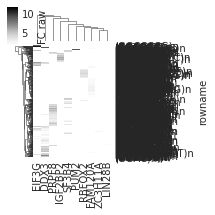

In [11]:
plot_mask(['Simple_repeat'], to_select = True, figsize = (3,3))
#plt.savefig(figdir / 'snRNA_family.pdf')

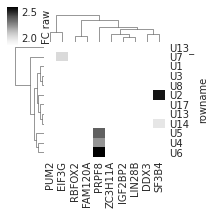

In [12]:
plot_mask(['snRNA'])
plt.savefig(figdir / 'snRNA_family.pdf')

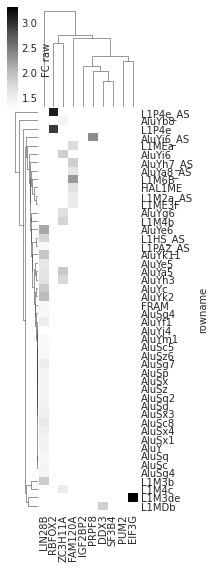

In [13]:
plot_mask(['L1', 'Alu'], to_select = True, figsize = (3,8))
plt.savefig(figdir / 'Alu_L1_family.pdf')

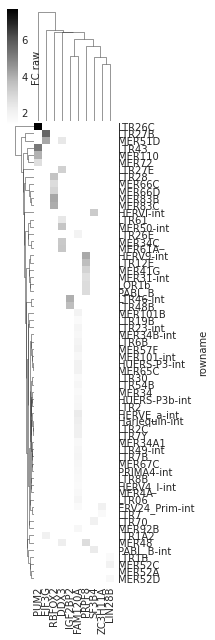

In [14]:
plot_mask(['ERV1', 'ERV1L'], to_select = True, figsize = (3,9))
plt.savefig(figdir / 'ERV_family.pdf')

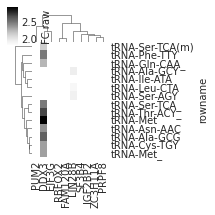

In [15]:
plot_mask(['tRNA'], to_select = True)
plt.savefig(figdir / 'tRNA_family.pdf')

In [16]:
small_rna_subset = megaoutputs_genome_masked.loc[megaoutputs_genome_masked['feature_type_top']=='EXON_SMALL']

In [17]:
enriched_type = []
for rbp in small_rna_subset.columns[small_rna_subset.columns.str.startswith(out_stem)]:
    cnt=small_rna_subset.loc[small_rna_subset[rbp], 'transcript_type_top'].value_counts()
    cnt.name = rbp
    enriched_type.append(cnt)
enriched_type = pd.concat(enriched_type, axis = 1).fillna(0).sort_index().T
enriched_type.index = [i.split('.')[1] for i in enriched_type.index]

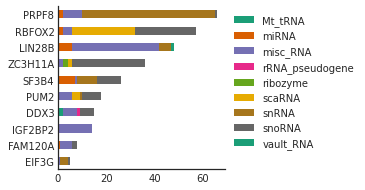

In [18]:
enriched_type.loc[enriched_type.sum(axis = 1).sort_values().index].plot.barh(stacked = True, figsize = (3,3))
plt.legend(bbox_to_anchor = (1,1))
sns.despine()
plt.savefig(figdir / 'smallRNA.pdf')

In [19]:
def plot_mask_genome(family, to_select = False, figsize = (3,3)):
    
    is_mask = megaoutputs_genome_masked.loc[megaoutputs_genome_masked['transcript_type_top'].isin(family), 
                                            megaoutputs_genome_masked.columns.str.startswith(out_stem)]
    fc = megaoutputs_genome_masked.loc[megaoutputs_genome_masked['transcript_type_top'].isin(family), 
                                       megaoutputs_genome_masked.columns.str.startswith('fc_raw:')]
    fc.columns = [i.split('.')[1] for i in fc.columns]
    is_mask.columns = [i.split('.')[1] for i in is_mask.columns]
    
    fc['name'] = [i.split(':')[-1] for i in megaoutputs_genome_masked.loc[fc.index, 'gene_name']]
    is_mask['name'] = [i.split(':')[-1] for i in megaoutputs_genome_masked.loc[fc.index, 'gene_name']]
    
    fc = fc.groupby(by = 'name').max()
    is_mask = is_mask.groupby(by = 'name').any()
    
    
    
    if to_select:
        to_plot = is_mask.index[is_mask.any(axis = 1)]
        sns.clustermap(fc.loc[to_plot],
                   figsize = figsize, cmap = 'Greys', yticklabels = 1,
                  mask = ~is_mask.loc[to_plot], cbar_kws = {'label':'FC raw'})
    else:
        sns.clustermap(fc,
                       figsize = figsize, cmap = 'Greys', yticklabels = 1,
                      mask = ~is_mask, cbar_kws = {'label':'FC raw'})

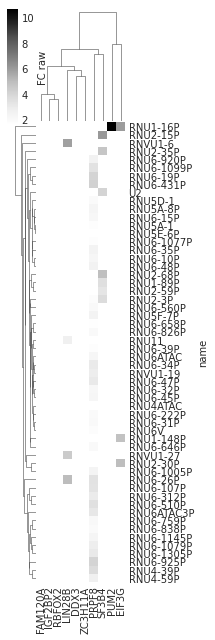

In [20]:
plot_mask_genome(['snRNA'], to_select = True, figsize = (3,9))
plt.savefig(figdir / 'RNU.pdf')

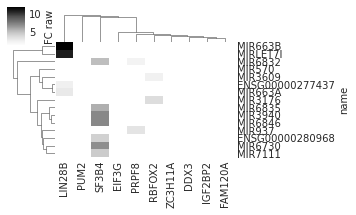

In [21]:
plot_mask_genome(['miRNA'], to_select = True, figsize = (5,3))
plt.savefig(figdir / 'miRNA.pdf')

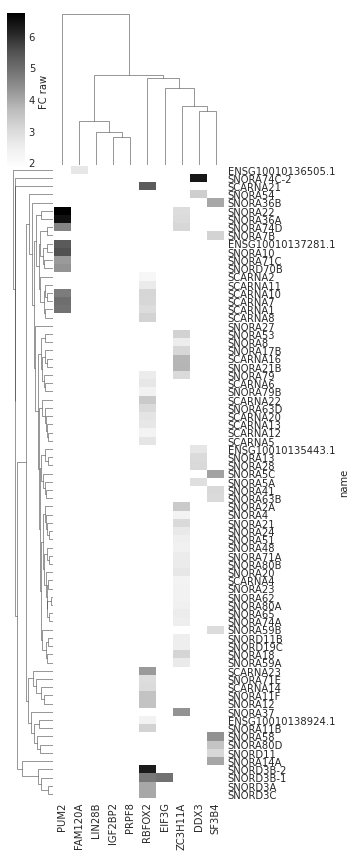

In [22]:
plot_mask_genome(['snoRNA', 'scaRNA'], to_select = True, figsize = (5,12))
plt.savefig(figdir / 'snoRNA.pdf')

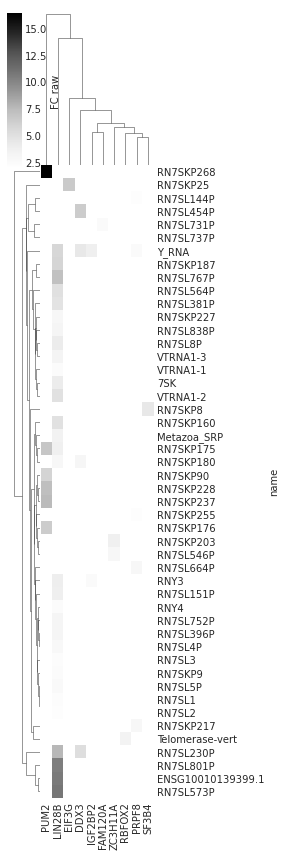

In [23]:
plot_mask_genome(['misc_RNA'], to_select = True, figsize = (4,12))
plt.savefig(figdir / 'miscRNA.pdf')